In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Regresión lineal Simple
Modelo: $y_i=\beta_0 + \beta_1x_i+\varepsilon_i$

Función de coste: $\hat{\beta}_1=$ <font size="4">$\frac{\sum_{i=1}^{n} (x_{i}-\overline{x})(y_{i}-\overline{y})}{\sum_{i=1}^{n} (x_{i}-\overline{x})^2}$</font>$,$ &nbsp;&nbsp;&nbsp;$\hat{\beta}_0=\overline{y}-\hat{\beta}_1\overline{x}$

In [3]:
def summation(serie):
    acum = 0
    for number in serie:
        acum = acum + number
    return acum

def mean(x_serie):
    return summation(x_serie)/len(x_serie)

def variance(serie, mean):
    diff = []
    for number in serie:
        diff.append((number - mean)**2)
    return summation(diff)

def covariance(serie_1, serie_2, mean_1, mean_2):
    result = []
    for pos in range(len(serie_1)):
        result.append((serie_1[pos] - mean_1) * (serie_2[pos] - mean_2))
    return summation(result)

# traer todas las filas de la columna tasa de delincuencia per capita por localidad
x = boston.data[:,0]
# precio de la vivienda
y = boston.target

# los procesos en este bloque estan basados en la esperanza (E())
x_mean = mean(x)
y_mean = mean(y)
b_variance = variance(x, x_mean)
b_1 = covariance(x, y, x_mean, y_mean) / b_variance
b_0 = y_mean - b_1 * x_mean

# corresponde al punto de corte en 'y' o el valor de 'y' cuando x=0 (o la tasa de delincuencia es 0)
print(b_0)
# la relación de crecimiento de la variable dependiente respecto a la independiente (es decir, entre menos criminalidad 
# haya, el precio de la vivienda crece en b_1 unidades)
print(b_1)
# predicción de un valor; en este caso el valor de la vivienda cuando la tasa de delincuencia es de x=0.93%
print(b_1 * 9.3e-01 + b_0)

24.0331061741239
-0.4151902779150907
23.646979215662867


# Calidad del ajuste de las rectas de regresión

Coeficiente de correlación de Pearson: $r_{xy}=\hat{\beta}_1$ <font size="4">$\frac{\sigma_x}{\sigma_y}$</font>

In [8]:
r = b_1 * (b_variance**0.5 / variance(y, y_mean)**0.5)

# si r es igual a 1 o -1 los datos se ajustan perfectamente a la recta
# si r esta entre 0.8 y 1 (el mismo rango para sus versiones negativas) el ajuste es sobresaliente
# si r esta entre 0.4 y 0.8 (el mismo rango para sus versiones negativas) el ajuste es regular puede que sea bueno o no
# si r esta entre 0 y 0.4 (el mismo rango para sus versiones negativas) el ajuste es malo
# en este caso hay un ajuste malo
print(r)

-0.3883046085868114


Formula para minimizar el error cuadratico medio (MMSE): $\beta = (X^{T}X)^{-1}X^{T}Y$

# Regresión lineal simple en forma matricial

Función de coste: $MMSE$

In [11]:
# traer todas las filas de la columna proporción de suelo residencial zonificado
X = np.array(boston.data[:, 1])
Y = np.array(boston.target)

# se halla el coeficiente de correlación antes, para saber con anterioridad la eficacia del modelo.
# esta función devuelve la matriz de covarianza, donde la diagonal de la matriz es la varianza muestral para cada 
# variable
r = np.cov(X, Y) / (np.std(X) * np.std(Y))

# En este caso el valor es bajo por lo que ya se sabe que el modelo no se adecua a la realidad antes de aplicarlo
print(r[0][1])

# añadimos una columna de 1's para crear los terminos independientes
X = np.array([np.ones(506), X]).T

b = np.linalg.inv(X.T @ X) @ X.T @ Y

# la primera posición correspondea al parametro b_0 (termino independiente) y la segunda posición al parametro b_1
print(b)
# predicción:
print(b[1] * 65 + b[0])

0.3611590956039107
[20.91757912  0.14213999]
30.15667873789786


Mismo proceso pero ahora utilizando las funciones de la biblioteca Numpy. Además, ahora se grafica la regresión y los datos

El metodo de mínimos cuadrados (LS) busca minimizar el valor de la suma de los residuos al cuadrado: $S=\sum_{i=1}^{n} (y_{i}-\hat{y})^2$. Para este caso se utilizara el metodo de mínimos cuadrados ordinarios (OLS), el cual utiliza para sus estimaciones el MMSE

Función de coste: $OLS$

0.6953599470715393
[  9.10210898 -34.67062078]
15.390978620053161


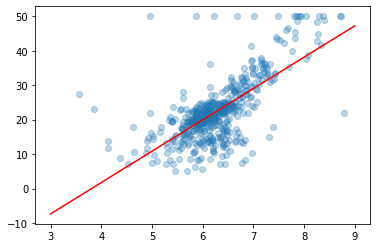

In [11]:
# traer todas las filas de la columna de numero de habitaciones por hogar
x = np.array(boston.data[:, 5])
y = np.array(boston.target)

# esta función devuelve la matriz de correlación (matriz muy parecidad a la de covarianza)
r = np.corrcoef(x, y)

print(r[1][0])

plt.scatter(x, y, alpha=0.3)

# añadimos una columna de unos según lo necesita la función de numpy
x = np.array([x, np.ones(506)]).T

# la primera posición corresponde a los resultados de la aplicación de la función de minimos cuadrados;
# la segunda posición a la suma de los residuos al cuadrado;
# la tercera posición al rango de la matriz (identificación de las variables independientes de la función/matriz);
# La cuarta posición a la descomposición en valores singulares de la matriz (halla la pseudoinversa de la matriz para 
# cumplir con la propiedad de poca multicolinearidad de las operaciones de regresión lineal).
# en la primera posición del arreglo hay otro arreglo donde la primera posición corresponde a la pendiente 
# (relación de crecimiento) y la otra al punto de corte
b = np.linalg.lstsq(x, y, rcond=None)[0]

print(b)
# predicción:
print(b[0] * 5.5 + b[1])
plt.plot([3, 9], [b[1] + b[0] * 3, b[1] + b[0] * 9], c="red")
plt.show()

# Regresión lineal múltiple

Modelo (las variables ahora son matrices): $Y=X\beta+\varepsilon$

Función de coste: $\hat{\beta}=(X^{T}X)^{-1}X^{T}Y$ o $MMSE$

### Calidad del ajuste

Hay varias formas de calcular la calidad del ajuste en una regresión multiple (cada una pudiendo dar diferentes medidas/perspectivas de la calidad); sin embargo, hay tres principales formas que son aplicables a este caso: el coeficiente de correlación multiple, el coeficiente de correlación parcial y el coeficiente de determinación.

Para el próximo ejemplo se va a utilizar el coeficiente de correlación multiple, el cual esta basado en el coeficiente de correlación de Pearson y se define como.

$R_{z,xx}=c^{T}R^{-1}_{xx}c,$

&nbsp;&nbsp;&nbsp;&nbsp; donde $c$ es el vector de las correlaciones <font size="4">$r_{x_{n}y}$</font> entre las variables predictoras $x_n$ (variables independientes) y la variable objetivo $y$ (variable dependiente), es decir, $c=(r_{x_{1}y}, r_{x_{2}y}, ..., r_{x_{n}y})^T$; y $R_{xx}$ es la matriz de correlación entre las variables predictoras.

El valor va a variar entre 0 y 1; entre más cerca este al 1 mejor va a ser el ajuste. Hay que tener en cuenta que el orden del calculo de las correlaciones importa, por lo que en este ejemplo la correlación se calculara con el óxido nítrico como primer regresor (x) y la proporción de zonas comerciales como segundo (y).

[ 34.28833676  -0.50622841 -11.02908086]
27.122996783689157
0.2428396732764912


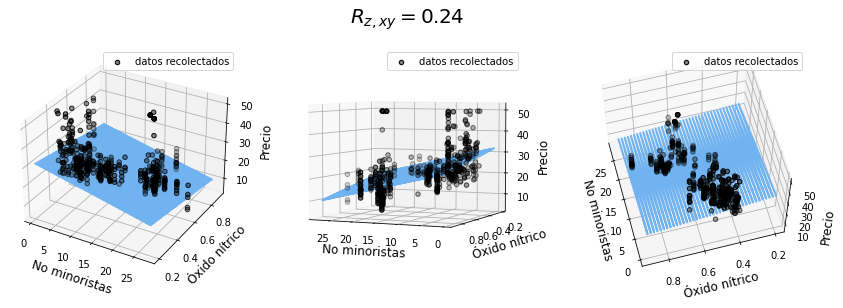

In [5]:
# traer todas las filas de la columna de zonas comerciales no minoristas por localidad y concentración de óxido nítrico
init_X = np.array([boston.data[:, 2], boston.data[:, 4]])
Y = np.array(boston.target)

x = init_X[0]
y = init_X[1]
z = Y

### Preparando los datos del modelo para su visualización ###

# rango de valores de las zonas comerciales no minoristas (se escoge 40 para ver una grafica mas densa de lineas)
x_range = np.linspace(np.amin(x), np.amax(x), 40)
# rango de valores del óxido nítrico
y_range = np.linspace(0.2, 0.9, 40)
# area de puntos donde se harán las predicciones
x_pred, y_pred = np.meshgrid(x_range, y_range)
model_vizu = np.array([np.ones(x_pred.flatten().size), x_pred.flatten(), y_pred.flatten()]).T

X = np.insert(init_X, 0, np.ones(init_X[0].size), axis=0).T

B = np.linalg.inv(X.T @ X) @ X.T @ Y

# la primera posición corresponde al termino independiente (b) y el resto de posición a las pendientes de las variables 
# independientes (m)
print(B)

predicted = model_vizu @ B

# predicción: para 5.2 de proporción de zonas comerciales y 0.411 de acumulación de óxido nítrico
print([1, 5.2, 0.411] @ B)

### hallando la correlación ###

c = np.empty(len(init_X))
for i, ind_variable in enumerate(init_X):
    c[i] = (np.cov(ind_variable, Y) / (np.std(ind_variable) * np.std(Y)))[0][1]
    
r_xx = np.zeros([len(init_X), len(init_X)])
for i, column_value in enumerate(init_X):
    for j, row_value in enumerate(init_X):
        if r_xx[i][j] == 0:
            result = (np.cov(column_value, row_value) / (np.std(column_value) * np.std(row_value)))[0][1]
            r_xx[i][j] = result
            r_xx[j][i] = result

for i, ele in enumerate(init_X):
    r_xx[i][i] = 1
r_zxy = c @ np.linalg.inv(r_xx) @ c.T

print(r_zxy)

### graficando ###

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.scatter(x, y, z, facecolor=(0, 0, 0, 0.5), s=20, edgecolor='k', label = 'datos recolectados')
    ax.plot(x_pred.flatten(), y_pred.flatten(), predicted, color='#70b3f0', linewidth=2)
    ax.set_xlabel('No minoristas', fontsize=12)
    ax.set_ylabel('Óxido nítrico', fontsize=12)
    ax.set_zlabel('Precio', fontsize=12)
    ax.legend()

ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R_{z,xy} = %.2f$' % r_zxy, fontsize=20)

fig.tight_layout()

Se hace el mismo proceso utilizando las funciones de la biblioteca Numpy. En esta ocasión se haran calculos en 4 dimensiones.

In [14]:
# traer todas las filas de la columna de zonas comerciales no minoristas por localidad, cercania con el rio Charles y 
# concentración de óxido nítrico
X = np.array([boston.data[:, 2], boston.data[:, 3], boston.data[:, 4]])
Y = np.array(boston.target)

r = np.corrcoef(X, Y)
c = r[-1, :-1]
R = c @ np.linalg.inv(r[:len(X), :len(X)]) @ c.T

print(R)

X = np.append(X, [np.ones(X[0].size)], axis=0).T

# la ultima posición de este arreglo corresponde al punto de corte (termino independiente), el resto de posiciones 
# a las pendientes de las variables independientes
B = np.linalg.lstsq(X, Y, rcond=None)[0]

print(B)
# predicción: para 5.2 de proporción de zonas comerciales, una casa lejana al rio Charles (0) y 0.411 de acumulación 
# de óxido nítrico
print([5.2, 0, 0.411, 1] @ B)

0.28723658140330444
[ -0.50162161   7.73076491 -12.78280617  34.67507785]
26.81291215720719
